In [135]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [171]:
%run dataloader.ipynb

In [172]:
batch_size=100
train_dataloader = DataLoader(train_set, collate_fn=collate_fn, batch_size=batch_size, shuffle=True)
dev_dataloader = DataLoader(dev_set, collate_fn=collate_fn, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_set, collate_fn=collate_fn, batch_size=batch_size, shuffle=True)

In [173]:
humor = {}
nonhumor = {}
num_batches = 0
for batch_idx, batch in enumerate(test_dataloader, 0):
    x_p,x_c,y,hid,x_p_len=map(lambda x: x.to('cpu'), batch)
    for i, label in enumerate(y):
        if label == 1:
            humor[hid[i].detach().tolist()] = x_p_len[i].detach().tolist()
        else:
            nonhumor[hid[i].detach().tolist()] = x_p_len[i].detach().tolist()
    num_batches += 1
print(num_batches)

/tmp/ipykernel_1818279/4016921915.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  context_w=np.array(self.language_sdk[hid]['context_embedding_indexes'])
/tmp/ipykernel_1818279/4016921915.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  context_of=np.array(self.word_aligned_openface_sdk[hid]['context_features'])
/tmp/ipykernel_1818279/4016921915.py:104: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you 

10


In [174]:
sorted_humor = {k: v for k, v in sorted(humor.items(), key=lambda item: item[1])}
sorted_nonhumor = {k: v for k, v in sorted(nonhumor.items(), key=lambda item: item[1])}

total = sorted_humor | sorted_nonhumor
sorted_total = {k: v for k, v in sorted(total.items(), key=lambda item: item[1])}

In [175]:
print(len(sorted_humor))
print(len(sorted_nonhumor))
print(len(sorted_total))

490
504
994


In [176]:
ignore_hids = list(sorted_nonhumor.keys())[:14]
print(ignore_hids)

[7485, 7492, 7475, 7488, 15447, 4904, 4465, 12327, 12521, 15301, 6409, 1246, 1247, 869]


In [142]:
language_sdk=load_pickle("language_sdk.pkl")

In [153]:
print(language_sdk[3876]['punchline_sentence'])

that was interesting


In [144]:
humor_lengths = Counter(sorted_humor.values())
nonhumor_lengths = Counter(sorted_nonhumor.values())
total_lengths = Counter(sorted_total.values())
print(total_lengths[20])

297


In [145]:
print(humor_lengths)

Counter({20: 145, 8: 31, 4: 25, 10: 25, 12: 24, 6: 23, 7: 21, 11: 21, 13: 21, 5: 20, 9: 20, 3: 19, 14: 15, 15: 15, 16: 14, 17: 13, 2: 12, 19: 11, 1: 8, 18: 7})


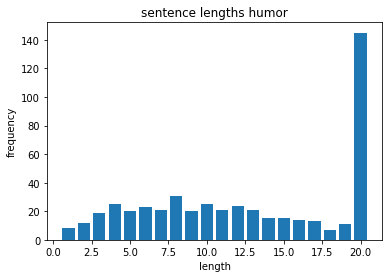

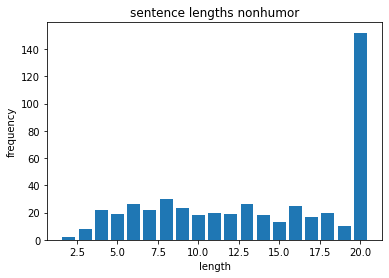

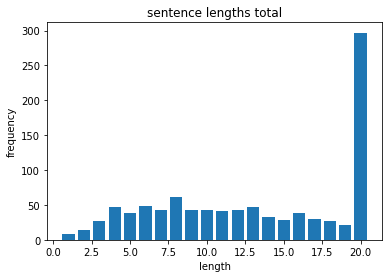

In [146]:
plt.bar(humor_lengths.keys(), humor_lengths.values())
plt.title('sentence lengths humor')
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

plt.bar(nonhumor_lengths.keys(), nonhumor_lengths.values())
plt.title('sentence lengths nonhumor')
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

plt.bar(total_lengths.keys(), total_lengths.values())
plt.title('sentence lengths total')
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()